# Ashish Kumar 

# Task 1- Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

## Importing necessary libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# checking for null objects in data and removing them
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Plotting a scatter plot of data to get any pattern

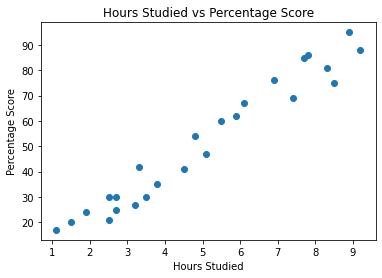

In [4]:
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours Studied vs Percentage Score')
plt.show()

As we see as hours studied increases the percentage score increases so there is positive linear relationship between variables

In [5]:
# separating dependent and independent variables
X=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values

In [6]:
# Separating dataset into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training linear model 

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plotting regression line

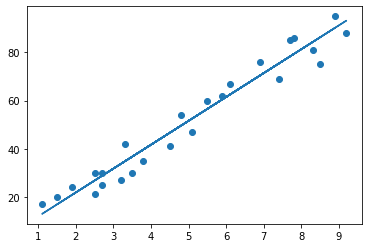

In [8]:
plt.scatter(X,y)
plt.plot(X,model.intercept_+model.coef_*X)
plt.show()

## Making predictions for test set and calculating r2 and cross-val score

In [9]:
predictions=model.predict(X_test)
pd.DataFrame({'Predicted':predictions,'Actual':y_test})

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9454906892105354

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=model, scoring='r2', X=X_train, y=y_train, cv=4)
score.mean()

0.9289939532340834

## Predicting the percentage score for student who studies 9.25 hours per day

In [12]:
model.predict([[9.25]])

array([93.69173249])